# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

# Notebook Presentation

In [4]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [5]:
df_apps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [6]:
print(df_apps.shape)

(10841, 12)


In [7]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [8]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
6919,Simply Yoga - Fitness Trainer for Workouts & P...,HEALTH_AND_FITNESS,4.10,6826,8.80,"1,000,000",Free,0,Everyone,Health & Fitness,"June 14, 2018",Varies with device
8394,NAVITIME - Map & Transfer Navi,MAPS_AND_NAVIGATION,4.20,41225,6.50,"5,000,000",Free,0,Everyone,Maps & Navigation,"August 3, 2018",Varies with device
7075,DU Privacy-hide apps、sms、file,VIDEO_PLAYERS,4.40,21762,4.65,"1,000,000",Free,0,Everyone,Video Players & Editors,"August 16, 2017",4.0.3 and up
5239,"REG - Check the regnumber, find information ab...",AUTO_AND_VEHICLES,3.90,3971,3.60,"100,000",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",4.4 and up
1333,G-NetWiFi Pro,TOOLS,3.30,6,1.50,100,Paid,$5.99,Everyone,Tools,"June 18, 2018",4.0 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns.

In [9]:
columns_to_drop=['Last_Updated','Android_Ver']
df_apps_1=df_apps.drop(columns=columns_to_drop)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows.

In [10]:
df_apps_1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [11]:
df_apps_clean=df_apps_1.dropna(subset=['Rating'])
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`.


In [12]:
df_apps_clean.duplicated().sum()

476

In [13]:
df_apps_clean.drop_duplicates(inplace=True, subset=['App','Type','Price'])

<ipython-input-13-4f7304cc8ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean.drop_duplicates(inplace=True, subset=['App','Type','Price'])


In [14]:
df_apps_clean.duplicated().sum()

0

In [15]:
print(df_apps_clean.shape)

(8199, 10)


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [16]:
df_apps_clean.loc[df_apps_clean['Rating'] == 5.0]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
2680,Florida Wildflowers,FAMILY,5.00,5,69.00,"1,000",Free,0,Everyone,Education
2750,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.00,34,12.00,"5,000",Free,0,Everyone,Comics
3030,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.00,24,3.20,"5,000",Free,0,Everyone,Tools
3115,Oración CX,LIFESTYLE,5.00,103,3.80,"5,000",Free,0,Everyone,Lifestyle


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please?

In [17]:
df_apps_clean.sort_values(by='Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [18]:
df_apps_clean.sort_values(by='Reviews',ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [19]:
rating=df_apps_clean['Content_Rating'].value_counts()
rating


Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [20]:
fig=px.pie(labels=rating.index, values=rating.values, title='Content Rating', names=rating.index, hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=15)
fig.show()


In [21]:
df_apps_clean.head(50)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
114,FK Atlantas,SPORTS,1.50,2,26.00,5,Free,0,Everyone,Sports
126,Tablet Reminder,MEDICAL,5.00,4,2.50,5,Free,0,Everyone,Medical
128,CQ ESPM,BUSINESS,5.00,2,3.40,5,Free,0,Everyone,Business
141,Clinic Doctor EHr,MEDICAL,5.00,2,7.10,5,Free,0,Everyone,Medical
151,EB Cash Collections,BUSINESS,5.00,1,4.30,5,Free,0,Everyone,Business


In [22]:
type(df_apps_clean.Installs)

pandas.core.series.Series

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install?

Check the datatype of the Installs column.

Count the number of apps at each level of installations.

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first.

In [23]:
# Remove commas from 'Installs' column and convert to integers
df_apps_clean['Installs'] = df_apps_clean['Installs'].str.replace(',', '').astype(int)

<ipython-input-23-2bc53abea7f6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:

# Filter the DataFrame
df_apps_clean.loc[df_apps_clean['Installs'] >= 1000000000].count()

App               20
Category          20
Rating            20
Reviews           20
Size_MBs          20
Installs          20
Type              20
Price             20
Content_Rating    20
Genres            20
dtype: int64

In [25]:
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [26]:
df_apps_clean.Price=df_apps_clean.Price.str.replace('$', "").astype(float)

<ipython-input-26-4b58033a4d25>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df_apps_clean[['App', 'Price']].groupby('Price').count()

,App
Price,
0.00,7595
0.99,104
1.00,2
1.20,1
1.29,1
...,...
299.99,1
379.99,1
389.99,1


### The most expensive apps sub $250

In [28]:
df_filter_price=df_apps_clean[df_apps_clean['Price']<250]
df_filter_price[['App', 'Price']].groupby('Price').count()

,App
Price,
0.00,7595
0.99,104
1.00,2
1.20,1
1.29,1
...,...
29.99,4
33.99,1
37.99,1


In [29]:
df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### Highest Grossing Paid Apps (ballpark estimate)

In [30]:
    df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
    df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

<ipython-input-30-a0fc2787ef13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle,"39,999,000.00"
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance,"19,999,500.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle,"4,000,000.00"
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle,"3,999,900.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [31]:
df_apps_clean.Category.nunique()

33

In [32]:
df_apps_clean[['App', 'Category']].groupby('Category').count()

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,262
COMICS,54
COMMUNICATION,257
DATING,134
EDUCATION,118


In [33]:
category_df=df_apps_clean.Category.value_counts().head(10)

### Vertical Bar Chart - Highest Competition (Number of Apps)

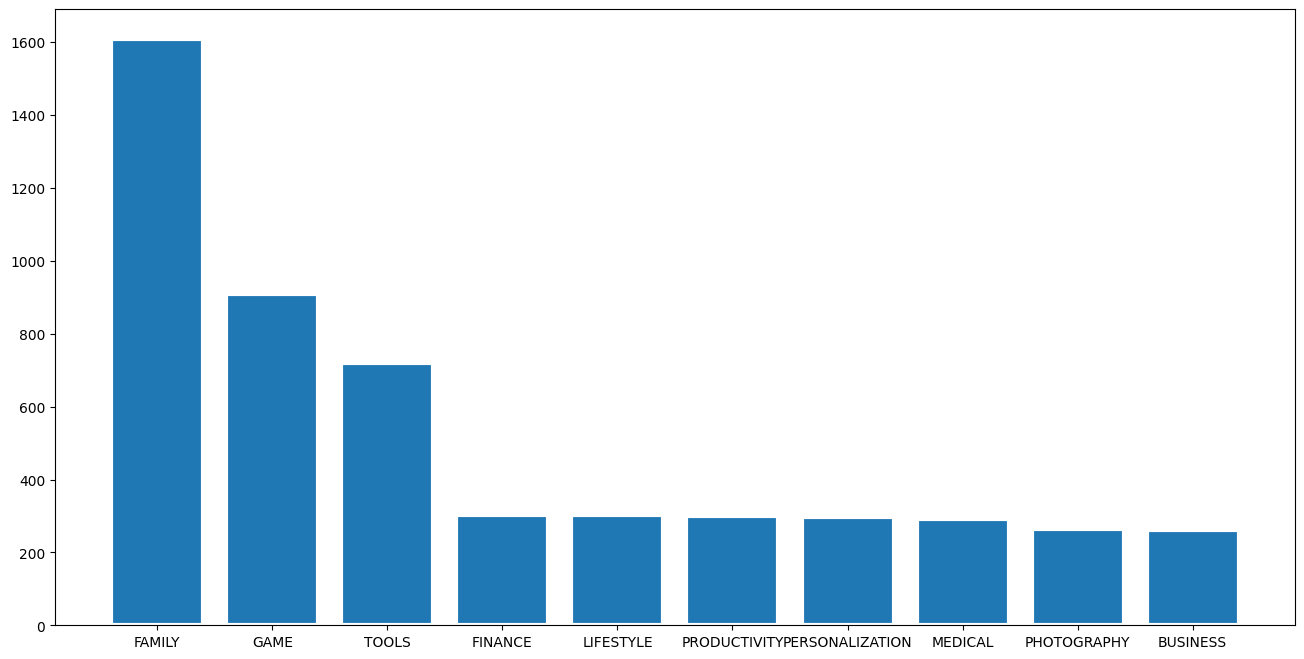

In [34]:
plt.figure(figsize=(16,8))
plt.bar(category_df.index, category_df.values, edgecolor="white", linewidth=3)
plt.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [35]:
highest_downloads=df_apps_clean[['Category','Installs']].groupby('Category').sum().sort_values(by='Installs', ascending=False).head(10)
highest_downloads

,Installs
Category,
GAME,13858762717
COMMUNICATION,11039241530
TOOLS,8099724500
PRODUCTIVITY,5788070180
SOCIAL,5487841475
PHOTOGRAPHY,4649143130
FAMILY,4437579590
VIDEO_PLAYERS,3916897200
TRAVEL_AND_LOCAL,2894859300


In [36]:
plt.figure(figsize=(16, 8))
h_bar = px.bar(x = highest_downloads.Installs,
                   y = highest_downloads.index,
                   orientation='h',
                   title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**:
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this.

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log')

In [37]:
df_summary = df_apps_clean.groupby('Category').agg({'App': 'count', 'Installs': 'sum'}).sort_values(by='App', ascending=False)

In [38]:
fig = px.scatter(x=df_summary.App, y=df_summary.Installs, color=df_summary.Installs, size=df_summary.App)
fig.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))

fig.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html).


In [65]:
stack=df_apps_clean.Genres.str.split(';', expand=True).stack()
stack_genre=stack.value_counts()
df_stack=pd.DataFrame({'Genre':stack_genre.index,'Counts':stack_genre.values})
df_stack

,Genre,Counts
0,Tools,719
1,Education,587
2,Entertainment,502
3,Action,304
4,Lifestyle,303
5,Finance,302
6,Productivity,301
7,Personalization,298
8,Medical,292
9,Sports,270


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data?

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/).

* Find a way to set the colour scale using the color_continuous_scale parameter.
* Find a way to make the color axis disappear by using coloraxis_showscale.

In [67]:
df_stack_15=df_stack.head(15)

In [80]:
fig=px.bar(df_stack_15, x='Genre', y='Counts', title='Top Genres', color='Counts', color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title="Genre", yaxis_title='Number of Apps', coloraxis_showscale=False)
fig.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [86]:
    df_apps_clean.Type.value_counts()

Type
Free    7595
Paid     604
Name: count, dtype: int64

In [120]:
df_f_vs_p=df_apps_clean.groupby(['Category','Type'], as_index=False).agg({'App':pd.Series.count})
dffvp=df_f_vs_p.sort_values(by='App', ascending=False).head(33)
dffvp

,Category,Type,App
19,FAMILY,Free,1456
25,GAME,Free,834
53,TOOLS,Free,656
21,FINANCE,Free,289
31,LIFESTYLE,Free,284
45,PRODUCTIVITY,Free,283
7,BUSINESS,Free,253
43,PHOTOGRAPHY,Free,248
51,SPORTS,Free,238
10,COMMUNICATION,Free,235


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart:

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category.

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value).

In [105]:
fig=px.bar(df_f_vs_p, x='Category'[:33], y='App'[:33], title='Free vs Paid by Category', barmode='group', color='Type')
fig.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
fig.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart.

<img src=https://imgur.com/uVsECT3.png>


In [110]:
df_f_ins=df_apps_clean.groupby(['Type', 'Installs'], as_index=False).agg({'Installs':pd.Series.sum})
df_f_ins

,Type,Installs
0,Free,1
1,Free,45
2,Free,510
3,Free,2100
4,Free,23700
5,Free,81500
6,Free,567000
7,Free,1800000
8,Free,8710000
9,Free,20850000


In [117]:
fig=px.box(df_apps_clean, x='Type', y="Installs", color="Type", points='all',  notched=True,
           title='How Many Downloads are Paid Apps Giving Up?')
fig.update_layout(yaxis=dict(type='log'))
fig.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below:

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories.

In [139]:
    df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']

In [140]:
fig=px.box(df_paid_apps, x='Category', y='Revenue_Estimate', title='How much can paid apps earn?')
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Revenue',
                  xaxis={'categoryorder': 'min ascending'},
                  yaxis=dict(type='log'))
fig.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [142]:
df_paid_apps.Price.median()

2.99

In [147]:
fig=px.box(df_paid_apps, x='Category', y='Price', title='How much can you charge?', points='all')
fig.update_layout(xaxis_title='Category', yaxis_title='Price', xaxis={'categoryorder':'max descending'}, yaxis=dict(type='log'))
fig.show()